In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# load the data

In [2]:
data = pd.read_csv("3.01.Country-clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [3]:
data.describe()

,Latitude,Longitude
count,6.000000,6.000000
mean,38.971667,-9.531667
std,32.155820,86.523904
min,-25.450000,-103.770000
25%,45.415000,-73.232500
50%,48.950000,-0.065000
75%,53.295000,8.400000
max,62.400000,133.110000


# plotting the points

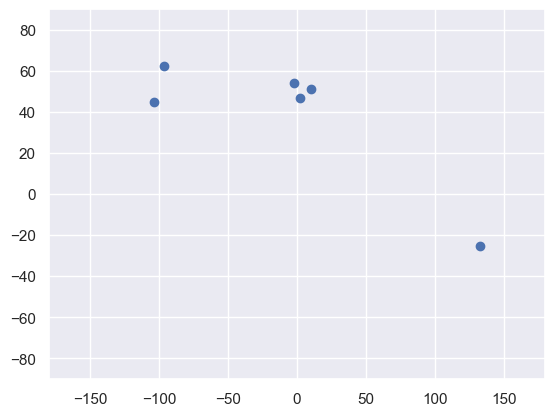

In [4]:
plt.scatter(data["Longitude"],data["Latitude"])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# putting the data

In [5]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [6]:
kmeans = KMeans(3)

In [7]:
kmeans.fit(x)

KMeans(n_clusters=3)

# clustering result

In [8]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [9]:
data_with_clusters = data.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


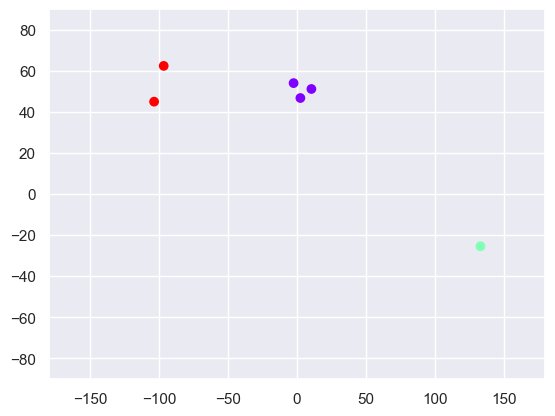

In [10]:
plt.scatter(data_with_clusters["Longitude"],data_with_clusters["Latitude"], c = data_with_clusters['Cluster'] , cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# using language or the categoircal features

In [11]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped["Language"].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [12]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [13]:
kmeans = KMeans(2)

In [14]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [15]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 0])

In [16]:

data_mapped['Cluster']=identified_clusters
data_mapped

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


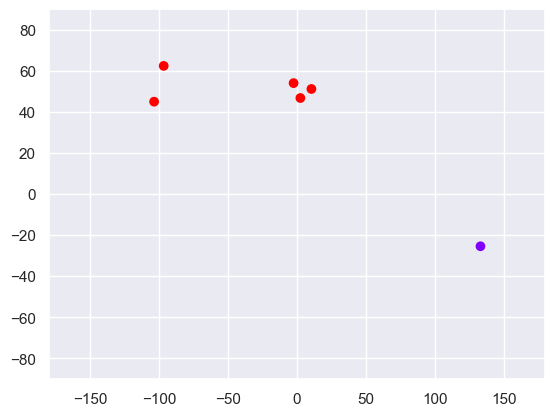

In [17]:
plt.scatter(data_mapped["Longitude"],data_mapped["Latitude"], c = data_mapped['Cluster'] , cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [18]:
kmeans.inertia_

13208.958119999996

In [19]:
wcss = []
for i in range(2,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [20]:
wcss

[13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

# The elbow method

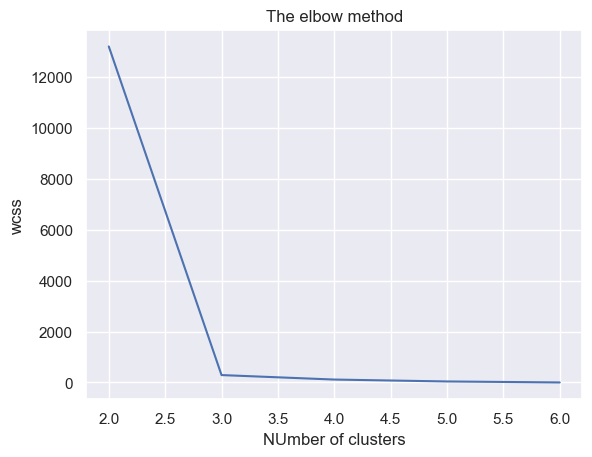

In [21]:
number_clusters = range(2,7)
plt.plot(number_clusters,wcss)
plt.title("The elbow method")
plt.xlabel("NUmber of clusters")
plt.ylabel("wcss")
plt.show()

In [41]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,6):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x)
    score=silhouette_score(x,kmeans.labels_)
    silhouette_coefficients.append(score)

In [38]:
silhouette_coefficients

[0.5303069674592465,
 0.7228699973307126,
 0.44802877916294254,
 0.06314309620532382]

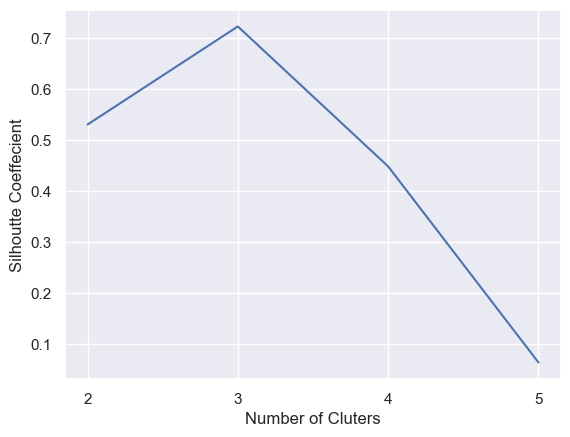

In [39]:
plt.plot(range(2,6),silhouette_coefficients)
plt.xticks(range(2,6))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()